In [142]:
import matplotlib.pyplot as plt 
from scipy.interpolate import spline
import numpy as np
from matplotlib import rc
rc('mathtext', default='regular')

In [1]:
yield_percentage = [35,21,14,10,10,10]
ash_content = [6,12,22,50,70,85]
def primary_curve_yield_points(yp):
    ypo = []
    sumin = 0
    for i in range(len(yp)):
        if i==0:
            ypo.append(yp[i]/2)
            sumin = yp[i]
        else:
            ypo.append(sumin + yp[i]/2)
            sumin += yp[i]
    return ypo

print(primary_curve_yield_points([0.44,55.33,24.39,9.53,10.31]))

[0.22, 28.105, 67.965, 84.925, 94.845]


C:\Users\obada\PycharmProjects\MINE432\venv\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\obada\PycharmProjects\MINE432\venv\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\obada\PycharmProjects\MINE432\venv\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\obada\PycharmProjects\MINE432\venv\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\obada\PycharmProjects\MINE432\venv\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


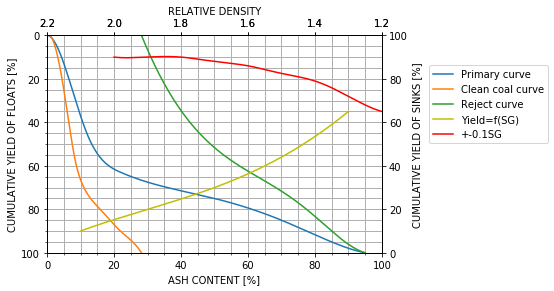

In [156]:

x1 = ash_content
x1.insert(0,0.1)
x1.append(95)

y1 = primary_curve_yield_points(yield_percentage)
y1.append(100)
y1.insert(0,0)

x2 = [0,5,6,8.2,11,15.9,21.9,28.2]
y2 = [0,25,35,56,70,80,90,100]


x3 = [28.2,40.2,53.6,68.3,77.5,85.0,95.0]
y_3= [0,35,56,70,80,90,100]

x_4 = [1.3,1.5,1.7,1.9,2.1]
y4 = [35,56,70,80,90]

x_5 = [1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
y_5 = [65,72,79,82.5,86,88,90,90,90]
 
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x_4 = np.array(x_4)
x_5 = np.array(x_5)
y1 = np.array(y1)
y2 = np.array(y2)
y_3 = np.array(y_3)
y4 = np.array(y4)
y_5 = np.array(y_5)

x1new = np.linspace(x1.min(),x1.max(),300)
y1smooth = spline(x1,y1,x1new)
x2new = np.linspace(x2.min(),x2.max(),400)
y2smooth = spline(x2,y2,x2new)
x3new = np.linspace(x3.min(),x3.max(),300)
y_3smooth = spline(x3,y_3,x3new)
x_4new = np.linspace(x_4.min(),x_4.max(),300)
y4smooth = spline(x_4,y4,x_4new)
x_5new = np.linspace(x_5.min(),x_5.max(),300)
y_5smooth = spline(x_5,y_5,x_5new)


fig, ax1 = plt.subplots()
plt.grid(linestyle='-',linewidth= 1, which='both', axis='both')
ax1.set_ylim(100,0)
ax1.set_xlim(0,100)
lns1=ax1.plot(x1new,y1smooth,label="Primary curve")
lns2=ax1.plot(x2new,y2smooth,label= "Clean coal curve")
lns3=ax1.plot(x3new,y_3smooth,label="Reject curve")

plt.minorticks_on()
ax1.set_ylabel('CUMULATIVE YIELD OF FLOATS [%]')
ax1.set_xlabel('ASH CONTENT [%]')

ax2 = ax1.twinx()
ax2.set_ylim(0,100)
ax2.set_ylabel('CUMULATIVE YIELD OF SINKS [%]')

ax3 = ax1.twiny()
ax3.set_xlim(2.2,1.2)
ax3.set_xlabel('RELATIVE DENSITY')
lns4 = ax3.plot(x_4new,y4smooth,'y',label="Yield=f(SG)")


ax4 = ax2.twiny()
ax4.set_xlim(2.2,1.2)
lns5= ax4.plot(x_5new,y_5smooth,'r',label="+-0.1SG")
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
plt.legend(lns,labs,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=3)

